In [ ]:
                                                 #  Naive Bayes #

# used dataset ' SalaryData_Train '

#1) Prepare a classification model using Naive Bayes
#for salary data

#Data Description:

#age -- age of a person
#workclass	-- A work class is a grouping of work
#education	-- Education of an individuals
#maritalstatus -- Marital status of an individulas
#occupation	 -- occupation of an individuals
#relationship --
#race --  Race of an Individual
#sex --  Gender of an Individual
#capitalgain --  profit received from the sale of an investment
#capitalloss	-- A decrease in the value of a capital asset
#hoursperweek -- number of hours work per week
#native -- Native of an individual
#Salary -- salary of an individual

In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv('SalaryData_Train.csv')

In [ ]:
# Display the first few rows of the dataset
print(data.head())

   age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1           

In [ ]:
# Drop any missing values
data = data.dropna()

In [ ]:
# Extract features and target variable
X = data.drop('Salary', axis=1)
y = data['Salary']

In [ ]:
# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
X_categorical = X.select_dtypes(include=['object'])
X_categorical = X_categorical.apply(label_encoder.fit_transform)
X = X.drop(X_categorical.columns, axis=1)
X = pd.concat([X, X_categorical], axis=1)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Naive Bayes classifier
naive_bayes_model = GaussianNB()

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 79.08%


In [ ]:
# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       <=50K       0.80      0.95      0.87      4490
        >50K       0.69      0.33      0.44      1543

    accuracy                           0.79      6033
   macro avg       0.75      0.64      0.66      6033
weighted avg       0.78      0.79      0.76      6033



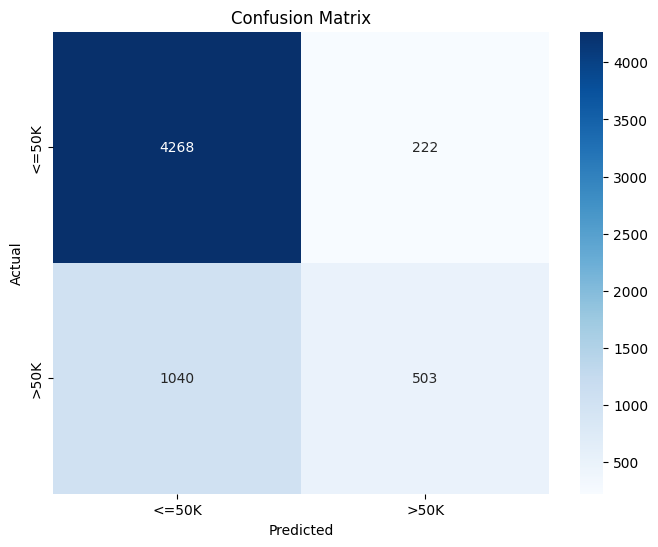

In [ ]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()